In [2]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

Create a wrangle function that takes the name of the  path file as input and returns a tidy DataFrame

In [4]:
def wrangle(db_path):
   

    # Read query results into DataFrame
    df = pd.read_csv(db_path)
    # check duplicated 
    df.duplicated().sum()
    # Drop duplicated
    df.drop_duplicates(inplace=True)

    
    return df

In [5]:
df=wrangle('HR_comma_sep.csv')

Use the info method to explore df. What type of features does this dataset have? Which column is the target? Are there columns will missing values that we'll need to address?

In [6]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


That's solid information. We know some of  our features are numerical and 2 are object  and that we don't have missing data. But, as always, it's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many employees  are leaving, and how many are not.

In [7]:

#  Read the first 5 row of the dataset 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Create a bar chart of the value counts for the "left" column. You want to calculate the relative frequencies of the classes, not the raw count, so we set the normalize argument to True

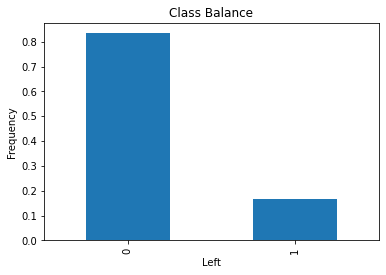

In [8]:
# Plot class balance
df['left'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Left")
plt.ylabel("Frequency")
plt.title("Class Balance");

That's good news Since it looks like most of the  employees in the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

we saw that there were 9 features of each company, some  of which had some kind of numerical value. It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values in "satisfaction_level" are distributed.

Use seaborn to create a boxplot that shows the distributions of the "satisfaction_level" column for both groups in the "left" column

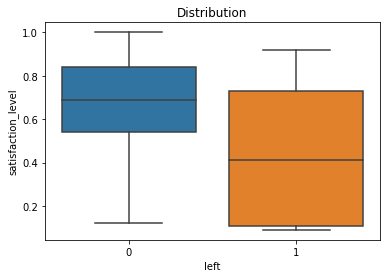

In [9]:
# Create boxplot
sns.boxplot(x="left",y="satisfaction_level",data=df)
# Label axes
plt.xlabel("left")
plt.ylabel("satisfaction_level")
plt.title("Distribution");

So we see that the employees that the satisfaction_level is between 0.1 and 6.4 tend to leave the company 

Repeat the exploration you just did for "satisfaction_level" on two other features in the dataset

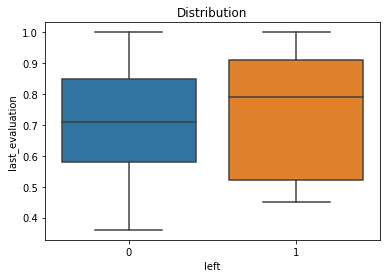

In [10]:
# Create boxplot
sns.boxplot(x="left",y="last_evaluation",data=df)
# Label axes
plt.xlabel("left")
plt.ylabel("last_evaluation")
plt.title("Distribution");

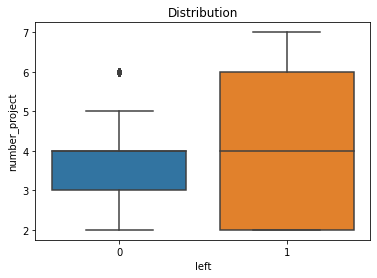

In [11]:
# Create boxplot
sns.boxplot(x="left",y="number_project",data=df)
# Label axes
plt.xlabel("left")
plt.ylabel("number_project")
plt.title("Distribution");

Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

Plot a correlation heatmap of features in df. Since "left" will be your target, you don't need to include it in your heatmap.

In [12]:
# Plot a correlation heatmap of the remaining numerical features in df. Since "left"
# will be your target, you don't need to include it in your heatmap.

X=df.drop('left',axis=1)

In [13]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


<ipython-input-14-32e1e326c46e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = X.corr()


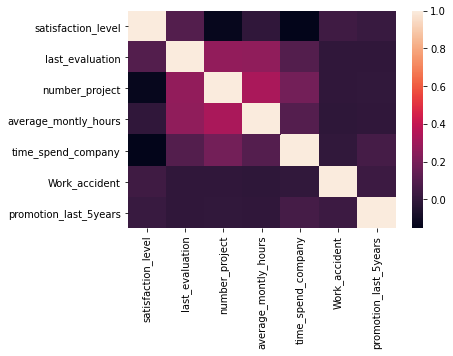

In [14]:
# Create correlation matrix
correlation = X.corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

 First, our data is imbalanced. This is something we need to address in our data preparation. Finally, the data set have sme duplicated rows  the best may is to drop them .

## Split

Create your feature matrix X and target vector y. Your target is "left"

In [1]:
target = "left"
X = df.drop('left',axis=1)
y = df[target]

NameError: name 'df' is not defined

In [16]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (11991, 9)
y shape: (11991,)


In order to make sure that our model can generalize, we need to put aside a test set that we'll use to evaluate our model once it's trained.

Divide your data (X and y) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. And don't forget to set a random_state for reproducibility.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9592, 9)
y_train shape: (9592,)
X_test shape: (2399, 9)
y_test shape: (2399,)


### Resample

Now that we've split our data into training and test sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data.

Create a new feature matrix X_train_under and target vector y_train_under by performing random under-sampling on your training data.

### Under-sampling
When data is imbalanced in different classes, one way we can balance it is reducing the number of observations in the majority class. This is called under-sampling. We can under-sample by randomly deleting some observations in the majority class. The open source imbalanced-learn (imported as imblearn) is an open-source library that works with scikit-learn and provides tools when dealing with imbalanced classes. Here's an example of randomly deleting observations from the majority class using  data.

In [18]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(3180, 9)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.92,0.84,3,164,2,0,0,accounting,medium
1,0.54,0.94,5,229,3,1,0,product_mng,low
2,0.54,0.90,3,206,3,0,0,technical,medium
3,0.75,0.91,4,243,3,0,0,technical,high
4,0.71,0.96,4,131,3,0,0,support,medium


And then we'll over-sample.

Create a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on your training data.

### Over-sampling
Over-sampling is the opposite of under-sampling. Instead of reducing the majority class, over-sampling increases the number of observations in the minority class by randomly making copies of the existing observations. Here is an example of making random copies from the minority class using the data and imblearn.

In [19]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(16004, 9)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.86,0.56,5,141,2,0,0,sales,medium
1,0.82,0.91,5,232,5,0,0,technical,low
2,0.62,0.52,3,148,3,0,0,sales,medium
3,0.43,0.74,4,129,6,0,0,hr,medium
4,0.85,0.79,3,156,3,0,0,sales,medium


## Build Model

### Baseline

As always, we need to establish the baseline for our model. Since this is a classification problem, we'll use accuracy score.

Calculate the baseline accuracy score for your model.

In [20]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.83


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

### Iterate

Now that we have a baseline, let's build a model to see if we can beat it.

Create three identical models: model_reg, model_under and model_over. All of them should use a OneHotEncoder followed by a LogisticRegression. Train model_reg using the unaltered training data. For model_under, use the undersampled data. For model_over, use the oversampled data.

 Create a pipeline named model that contains a OneHotEncoder transformer and a LogisticRegression predictor. Then fit it to the training data.

In [21]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
 LogisticRegression()
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    OneHotEncoder(use_cat_names=True),
 LogisticRegression()
)

model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
     OneHotEncoder(use_cat_names=True),
 LogisticRegression()
)

model_over.fit(X_train_over, y_train_over)

C:\Users\akwow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akwow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Department', 'salary'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

## Evaluate

Calculate training and test accuracy for your three models.

A natural choice for a metric for classification is accuracy. Accuracy is equal to the number of observations you correctly classified over all observations. For example, if your model properly identified 77 out of 100 images, you have an accuracy of 77%. Accuracy is an easy metric to both understand and calculate. Mathematically, it is simply

number of correct observationsnumber of observations.
$$ \frac{\text{number of correct observations}}{\text{number of observations}}.$$
 
Model accuracy can be calculated using the accuracy_score function. The function requires two arguments, the true labels and the predicted labels. For example, if we want to calculate the model accuracy score on the training data:

In [22]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8334
Test Accuracy: 0.8308
Training Accuracy: 0.7794
Test Accuracy: 0.7882
Training Accuracy: 0.7707
Test Accuracy: 0.7845


We can see that the two last model didn't beat the baseline so is not the best Algorithm for this problem 

But let continue the Evaluation

As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

Plot a confusion matrix that shows how your best model performs on your validation set.

### Confusion Matrix
Accuracy score may not provide enough information to assess how a model is performing because it only gives us an overall score. Also, imbalanced data can lead to a high accuracy score even when a model isn't particularly useful. If we want to know what fraction of all positive predictions were correct and what fraction of positive observations did we identify, we can use a confusion matrix.

from sklearn.metrics import ConfusionMatrixDisplay

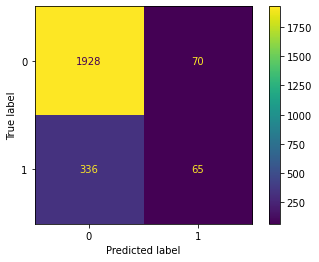

In [25]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

We can interpret as 1928 of employees  were coreectly predict as will not leave the company and 65 of employees  were coreectly predict as will  leave the company 

And we have 70 of employees  were wrongly  predict as will  leave the company and 336 of employees  were wrongly  predict as will not  leave the company

## Communicate

In [26]:
model_reg.predict(X_train)[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:

# see the difference between predict and predict_proba

y_train_pred_proba = model_reg.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.97456959 0.02543041]
 [0.85053701 0.14946299]
 [0.87821304 0.12178696]
 [0.65987865 0.34012135]
 [0.94213546 0.05786454]]


Extract the feature names and importances from your model

In [28]:
features = model_reg.named_steps['onehotencoder'].get_feature_names()
importances = model_reg.named_steps['logisticregression'].coef_[0]

C:\Users\akwow\anaconda3\lib\site-packages\category_encoders\utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [29]:
importances[:3]

array([-3.64183475, -0.04764628, -0.22145907])

In [30]:
odds_ratios = pd.Series(np.exp(importances),index=features).sort_values()
odds_ratios.head()

satisfaction_level       0.026204
salary_high              0.217315
Work_accident            0.240332
Department_RandD         0.630638
Department_management    0.669784
dtype: float64

Text(0.5, 0, 'Odds Ratio')

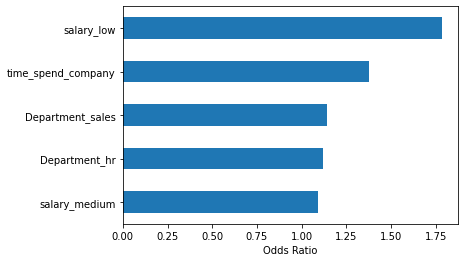

In [31]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind='barh')
plt.xlabel("Odds Ratio")